In [1]:
# fashion_mnist
import tensorflow as tf
from tensorflow import keras
import numpy as np

(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')

x_train = x_train.reshape(60000, -1)
x_test  = x_test.reshape(10000, -1)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [2]:
# data normalization

mean = np.mean(x_train)
std  = np.std(x_train)

x_train = (x_train-mean)/std
x_test  = (x_test-mean)/std

In [3]:
class MyReluActivation(tf.keras.layers.Layer):
    def __init__(self):
        super(MyReluActivation, self).__init__()

    def call(self, inputs):
        return tf.maximum(inputs, 0)

In [6]:
class MyDenseLayer(tf.keras.layers.Layer):
    def __init__(self, num_outputs):
        super(MyDenseLayer, self).__init__()
        self.num_outputs = num_outputs

    def build(self, input_shape):
        self.kernel = self.add_weight("kernel",
                                      shape=[int(input_shape[-1]), self.num_outputs])
        self.bias   = self.add_weight("bias",
                                      shape=[self.num_outputs])

    def call(self, inputs):
        return tf.matmul(inputs, self.kernel) + self.bias

In [7]:
import tensorflow as tf
import tensorflow.keras as keras

# create model
model = keras.Sequential()
model.add(keras.Input(shape=(784,)))
model.add(MyDenseLayer(256))
model.add(MyReluActivation())
model.add(MyDenseLayer(10))
model.add(tf.keras.layers.Softmax())
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_dense_layer_2 (MyDenseLa  (None, 256)              200960    
 yer)                                                            
                                                                 
 my_relu_activation_1 (MyRel  (None, 256)              0         
 uActivation)                                                    
                                                                 
 my_dense_layer_3 (MyDenseLa  (None, 10)               2570      
 yer)                                                            
                                                                 
 softmax_1 (Softmax)         (None, 10)                0         
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
________________________________________________

In [8]:
# optimizer and loss
model.compile(optimizer='sgd', 
              loss='sparse_categorical_crossentropy', 
              metrics=['sparse_categorical_accuracy'])

# training
history = model.fit(x_train, y_train, 
                    validation_data=(x_test, y_test), 
                    batch_size=256, epochs=100, verbose=2)

Epoch 1/100
235/235 - 2s - loss: 0.8144 - sparse_categorical_accuracy: 0.7247 - val_loss: 0.6208 - val_sparse_categorical_accuracy: 0.7805 - 2s/epoch - 7ms/step
Epoch 2/100
235/235 - 1s - loss: 0.5475 - sparse_categorical_accuracy: 0.8105 - val_loss: 0.5452 - val_sparse_categorical_accuracy: 0.8085 - 1s/epoch - 5ms/step
Epoch 3/100
235/235 - 1s - loss: 0.4939 - sparse_categorical_accuracy: 0.8281 - val_loss: 0.5088 - val_sparse_categorical_accuracy: 0.8210 - 1s/epoch - 5ms/step
Epoch 4/100
235/235 - 1s - loss: 0.4636 - sparse_categorical_accuracy: 0.8380 - val_loss: 0.4840 - val_sparse_categorical_accuracy: 0.8307 - 1s/epoch - 5ms/step
Epoch 5/100
235/235 - 1s - loss: 0.4438 - sparse_categorical_accuracy: 0.8443 - val_loss: 0.4680 - val_sparse_categorical_accuracy: 0.8355 - 1s/epoch - 5ms/step
Epoch 6/100
235/235 - 1s - loss: 0.4283 - sparse_categorical_accuracy: 0.8503 - val_loss: 0.4614 - val_sparse_categorical_accuracy: 0.8359 - 1s/epoch - 5ms/step
Epoch 7/100
235/235 - 1s - loss: 0

Epoch 52/100
235/235 - 1s - loss: 0.2748 - sparse_categorical_accuracy: 0.9034 - val_loss: 0.3566 - val_sparse_categorical_accuracy: 0.8729 - 1s/epoch - 5ms/step
Epoch 53/100
235/235 - 1s - loss: 0.2734 - sparse_categorical_accuracy: 0.9035 - val_loss: 0.3533 - val_sparse_categorical_accuracy: 0.8725 - 1s/epoch - 5ms/step
Epoch 54/100
235/235 - 1s - loss: 0.2720 - sparse_categorical_accuracy: 0.9042 - val_loss: 0.3496 - val_sparse_categorical_accuracy: 0.8743 - 1s/epoch - 5ms/step
Epoch 55/100
235/235 - 1s - loss: 0.2703 - sparse_categorical_accuracy: 0.9051 - val_loss: 0.3487 - val_sparse_categorical_accuracy: 0.8764 - 1s/epoch - 5ms/step
Epoch 56/100
235/235 - 1s - loss: 0.2690 - sparse_categorical_accuracy: 0.9050 - val_loss: 0.3530 - val_sparse_categorical_accuracy: 0.8734 - 1s/epoch - 5ms/step
Epoch 57/100
235/235 - 1s - loss: 0.2677 - sparse_categorical_accuracy: 0.9058 - val_loss: 0.3487 - val_sparse_categorical_accuracy: 0.8762 - 1s/epoch - 5ms/step
Epoch 58/100
235/235 - 1s - 

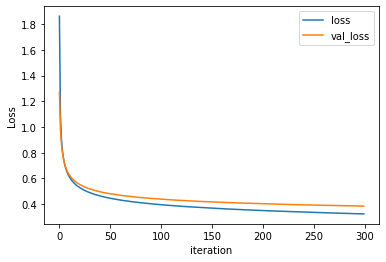

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

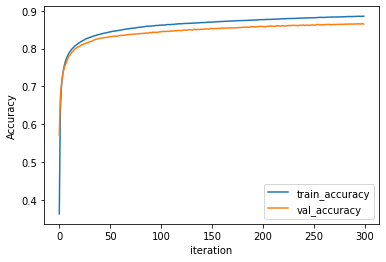

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['sparse_categorical_accuracy'], label='train_accuracy')
plt.plot(history.history['val_sparse_categorical_accuracy'], label='val_accuracy')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()

In [11]:
model.evaluate(x_test, y_test, 256)

40/40 [==============================] - 0s 3ms/step - loss: 0.3851 - sparse_categorical_accuracy: 0.8647


[0.38506269454956055, 0.8647000193595886]